In [1]:
import numpy as np
import os
import math
import cv2
from cv2 import *
from matplotlib import pyplot as plt
print (cv2.__version__)


def plt_show(image, title=""):
    if (len(image.shape) <= 3):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

3.4.1


In [2]:
img = cv2.imread('C:/Users/Udita/Hackathon/data1.jpg')
imshow('C:\\Users\\Udita\\Hackathon\\data1.jpg', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('C:\\Users\\Udita\\Downloads\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
cv2.imshow('C:\\Users\\Udita\\Hackathon\\data1.jpg',img)


In [3]:
#Open a thread to manage external cv2 interaction
cv2.startWindowThread()

#Create a window holder to show your image in
cv2.namedWindow("C:\\Users\\Udita\\Hackathon\\data1.jpg", cv2.WINDOW_NORMAL)
cv2.imshow("C:\\Users\\Udita\\Hackathon\\data1.jpg",img)

#Press any key to close external 
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
print (type(img))

<class 'numpy.ndarray'>


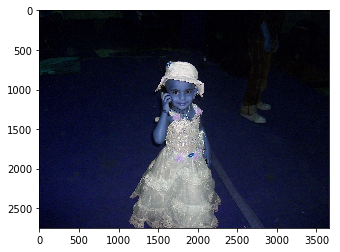

In [5]:
plt.imshow(img)
plt.show()

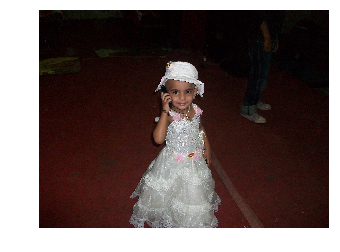

In [6]:
#Pixel Color Conversion
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

#Removing ticks off
plt.axis("off")
plt.show()

In [7]:
#Read and write images
cv2.imwrite("C:\\Users\\Udita\\Hackathon\\data1.jpg", img)
cv2.imwrite("C:\\Users\\Udita\\Hackathon\\data1_RGB.png", img_RGB)

os.system("nautilus images")

1

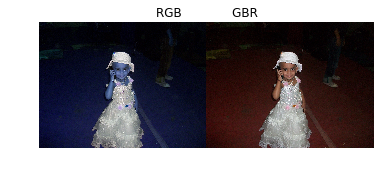

In [8]:
#Read in GBR or RGB
read_mode = 1
picture_GBR = cv2.imread("C:\\Users\\Udita\\Hackathon\\data1.jpg", read_mode)
picture_RGB = cv2.imread("C:\\Users\\Udita\\Hackathon\\data1_RGB.png", read_mode)

# numpy intervention
picture = np.hstack((picture_GBR, picture_RGB))
plt.axis("off")
plt.title("RGB             GBR")
plt.imshow(picture, cmap = "Greys_r")
plt.show()

In [9]:
detector = cv2.CascadeClassifier("C:\\Users\\Udita\\Downloads\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_alt.xml")
scale_factor = 1.2
min_neighbours = 5
min_size = (30,30)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT #\ cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \ cv2.CASCADE_SCALE_IMAGE
faces_coord = detector.detectMultiScale(img, scaleFactor= scale_factor, minNeighbors = min_neighbours, minSize = min_size , flags=flags)
print( "Type: " + str(type(faces_coord)))
print(faces_coord)
print("Length: "+ str(len(faces_coord)))

Type: <class 'numpy.ndarray'>
[[1644  923  331  331]]
Length: 1


In [10]:
def resize(img, size=(100, 100)):
   #This function resizes the pixel intensity in the image
    images_norm = []
    for image in img:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # using different OpenCV method if enlarging or shrinking
        if image.shape < size:
            image_norm = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm

In [11]:
def normalize_intensity(img):
   # This method normalizes the size and pixel intensity of an image. 
    images_norm = []
    for image in img:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

In [13]:
#Sample of normalized intensity
#face_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#face_bw_eq = cv2.equalizeHist(face_bw)
#plt_show(np.hstack((face_bw, face_bw_eq)), "Before"   "After")

In [14]:
def cut_face_rectangle(img, face_coord):
    # Cuts the image to just show the face.
    images_rectangle = []
    for (x, y, w, h) in face_coord:
        images_rectangle.append(img[y: y + h, x: x + w])
    return images_rectangle

In [15]:
from IPython import display 
try:
    while True:
        frame = img
        faces_coord = detector.detectMultiScale(img, scaleFactor= scale_factor, minNeighbors = min_neighbours, minSize = min_size , flags=flags)
        if (len(faces_coord)):
            faces = cut_face_rectangle(frame, faces_coord)
            faces = normalize_intensity(faces)
            plt_show(faces[0])
            display.clear_output(True)
except KeyboardInterrupt:
    print("InterruptOccurred")

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [ ]:
def draw_face_rectangle(img, faces_coord):
    # Draws a rectangle around the face found.
    
    for (x, y, w, h) in faces_coord:
        cv2.rectangle(img, (x, y), (x + w, y + h), (206, 0, 209), 2)
    return img




In [ ]:
#Draw a rectangule around the face
for (x,y,w,h) in faces_coord:
    cv2.rectangle(img, (x,y), (x+w, y+h), (150,150,0),8)
plt_show(img)